In [2]:
# import libraries
import os
import sys
sys.path.append('../')
from trajectory_planning.trajectory_class import Trajectory
from controller.MPC_controller_class import MPC_controller
from animation.animate_traj import animate_traj

%load_ext autoreload
%autoreload 2

# Defining user parameters for the simulation

In [3]:
# user parameters
from examples.example_parameters import *

# Trajectory generation

In [4]:
# import example trajectory
from trajectory_planning.examples.infinity_symbol import states as states
from trajectory_planning.examples.infinity_symbol import total_time as total_time

In [5]:
example_traj = Trajectory()
example_traj.add_new_configuration(states, env_params, rocket_params, controller_params)
example_traj_parameters = example_traj.generate_trajectory(total_time)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Interpolating trajectory...
Interpolation done!
Starting post-processing step...
Post-processing step done.
Checking drift...
Drift check passed!


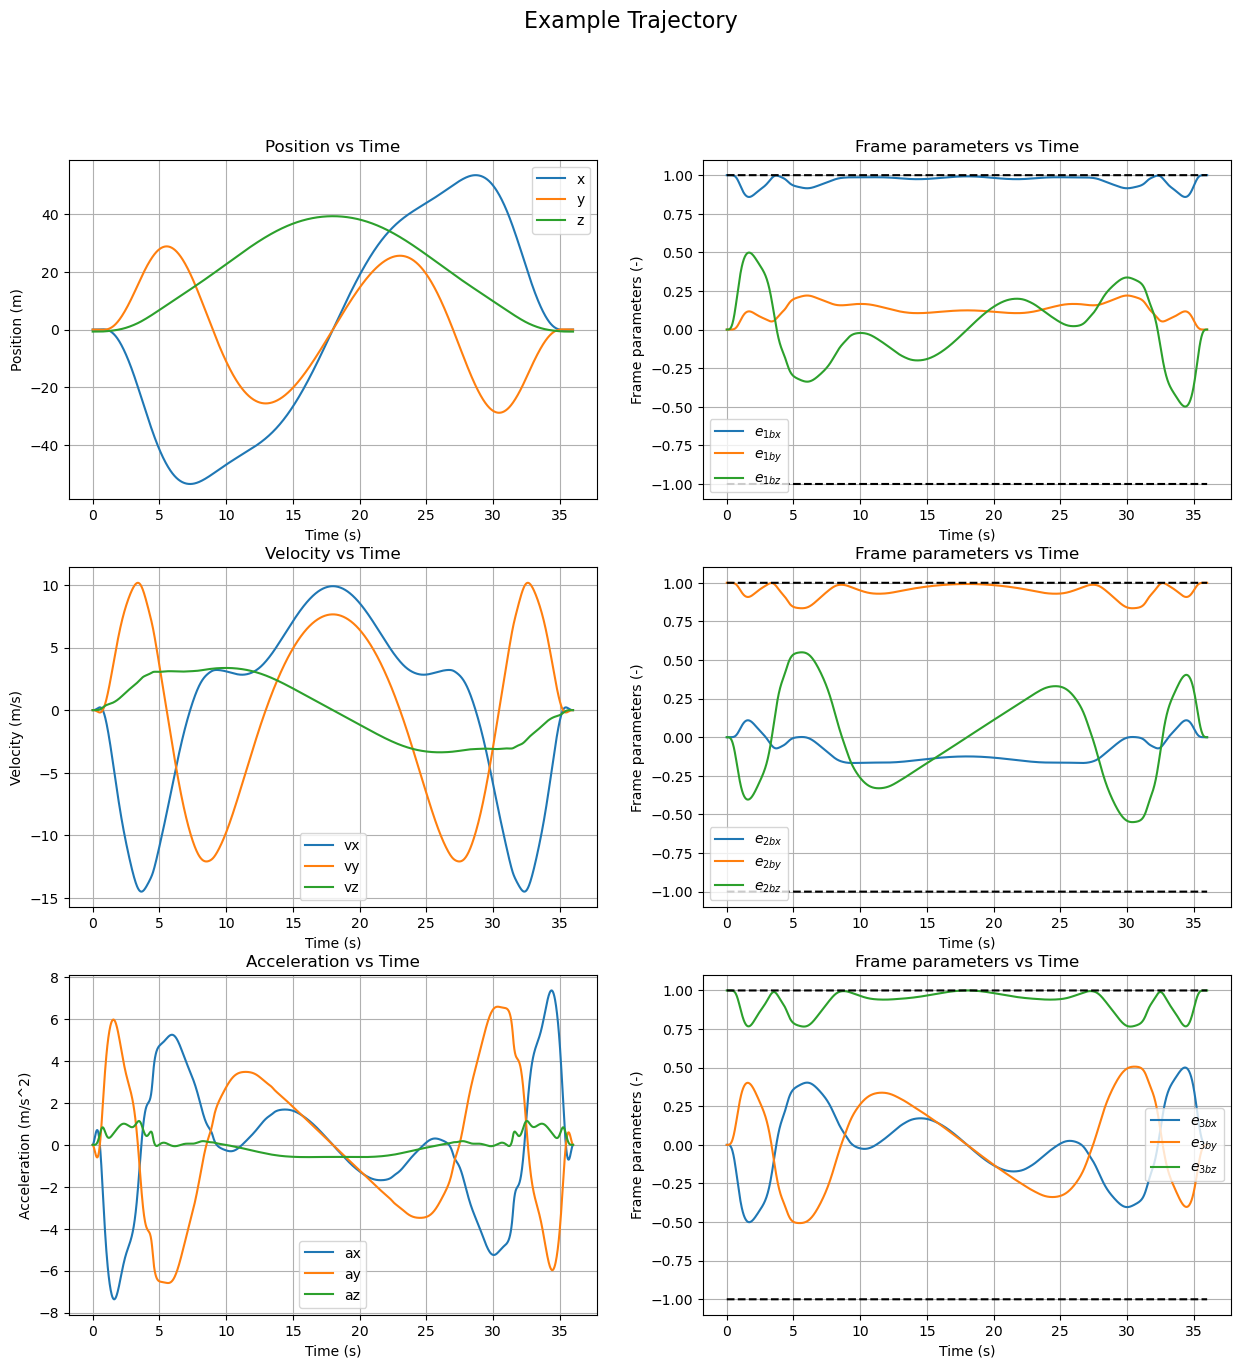

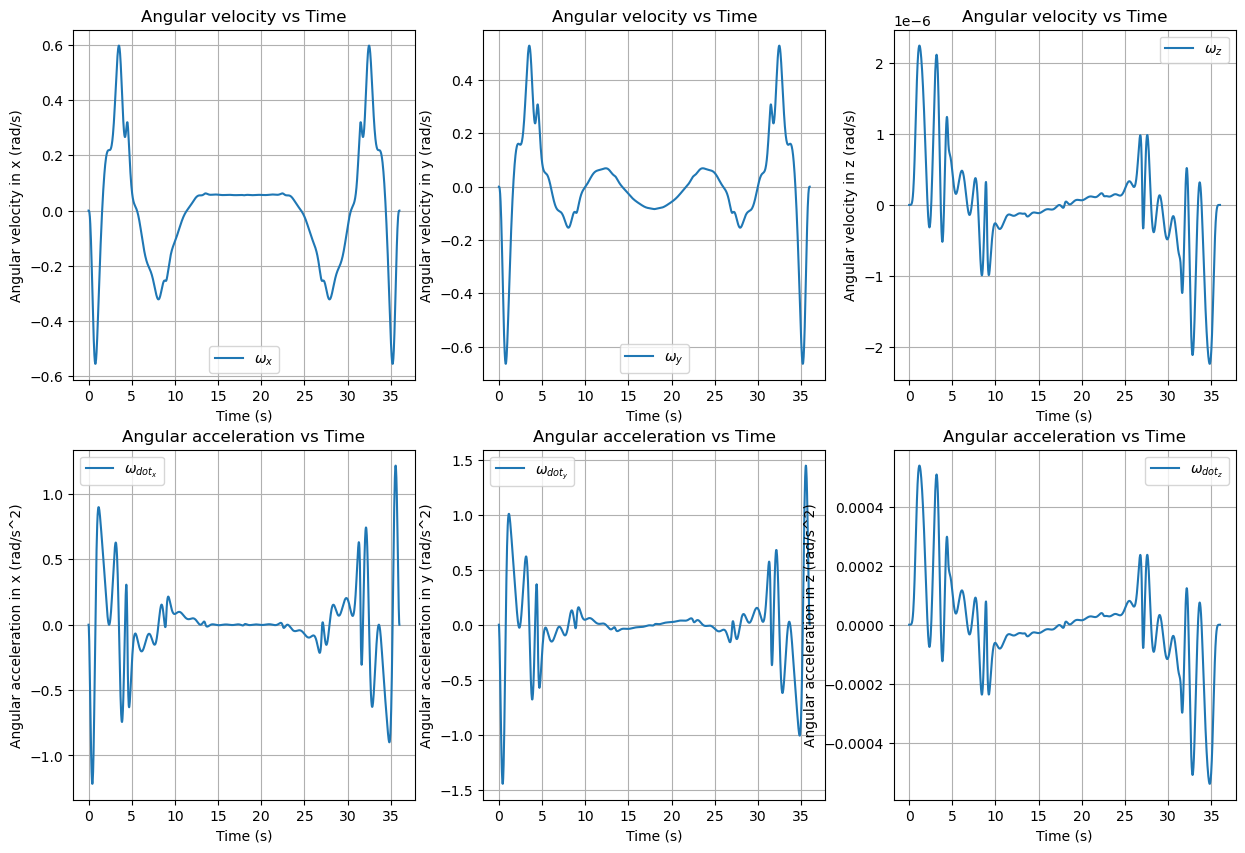

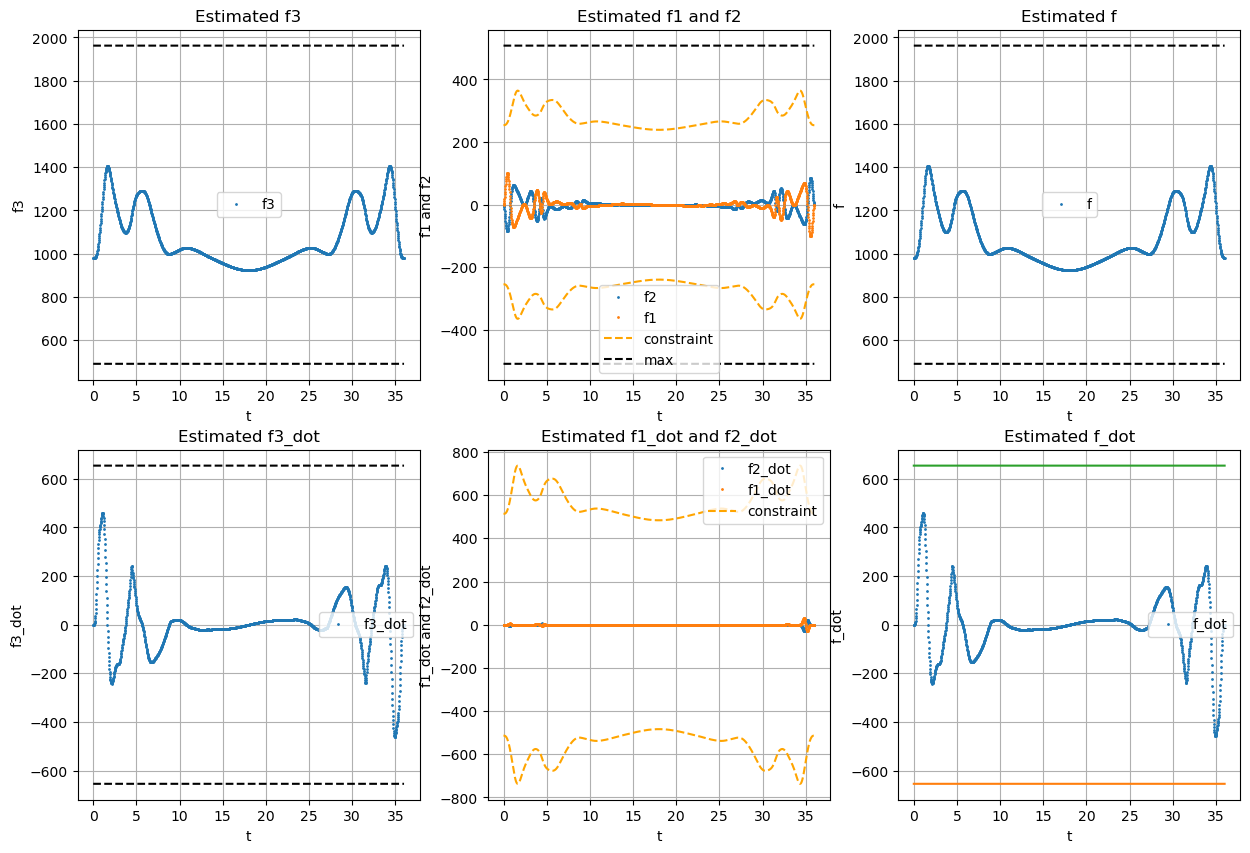

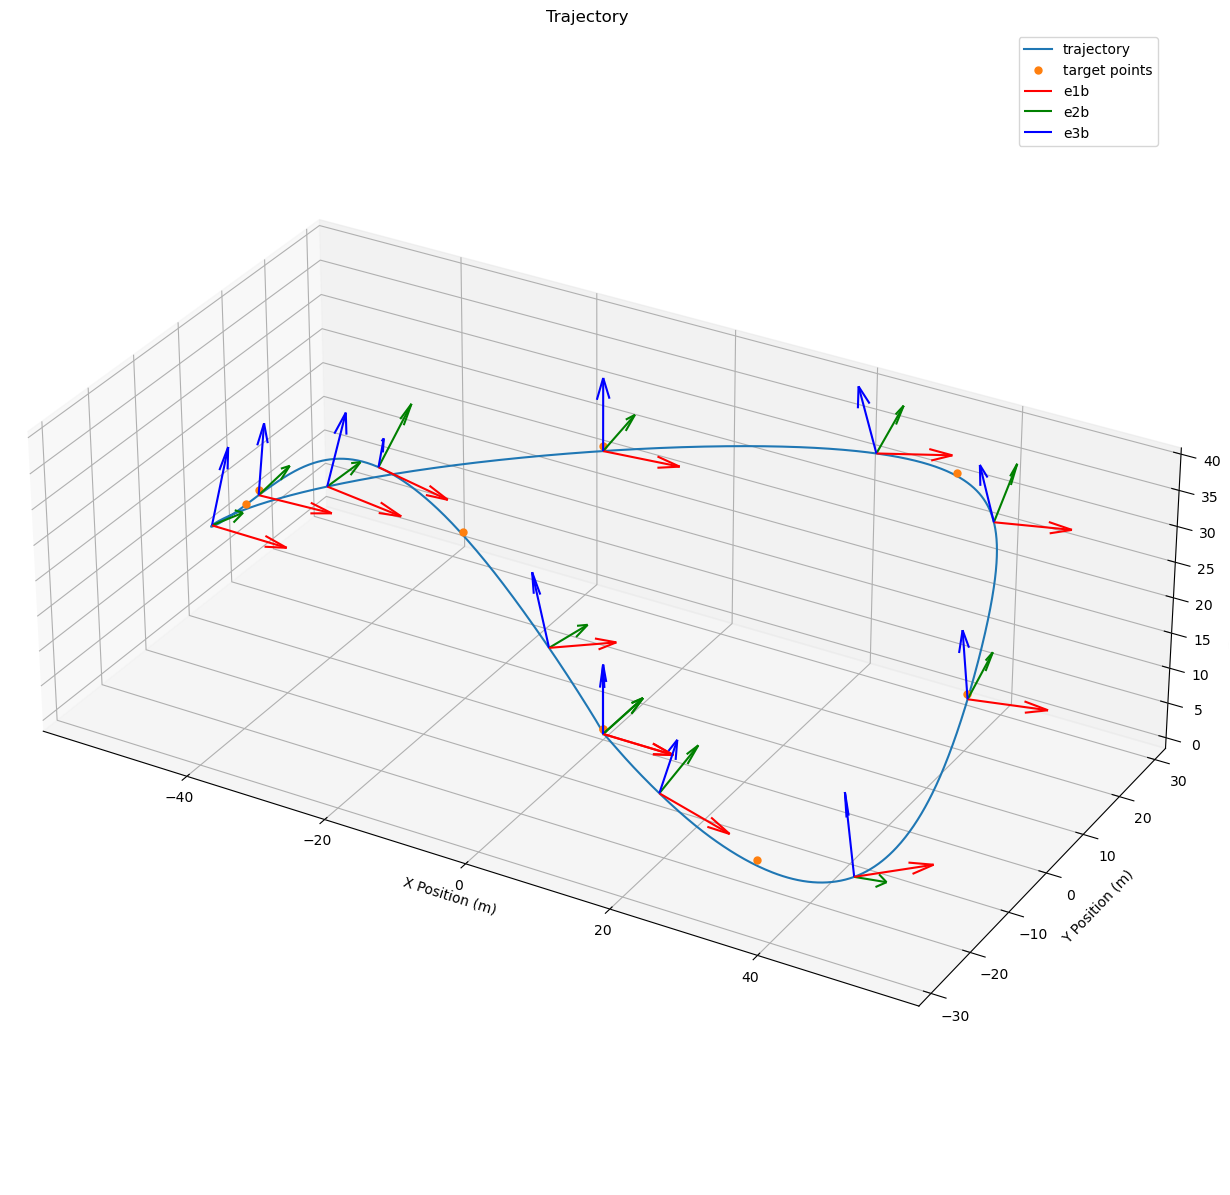

In [6]:
example_traj.plot_trajectory("Example Trajectory")

# Controller simulation

In [7]:
controller = MPC_controller(
    env_params=env_params,
    rocket_params=rocket_params,
    controller_params=controller_params,
    trajectory_params=example_traj_parameters,
)

################################## Simulation ##################################
t, x, u, state_horizon_list, control_horizon_list = controller.simulate_inside(total_time, plot_online=False)

Starting simulation
Solving...
Simulation finished


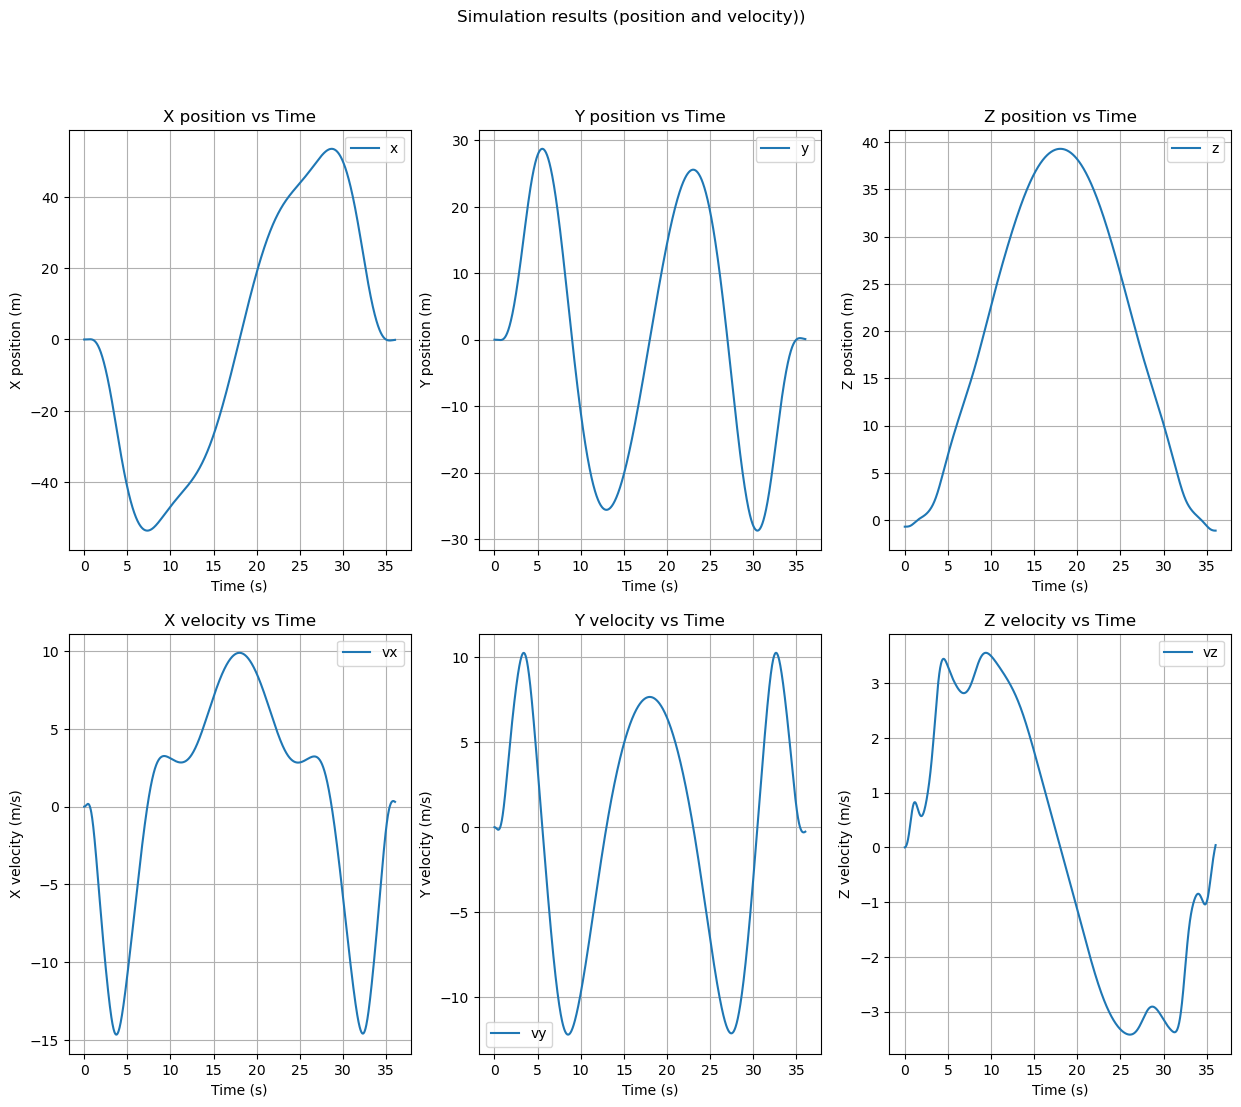

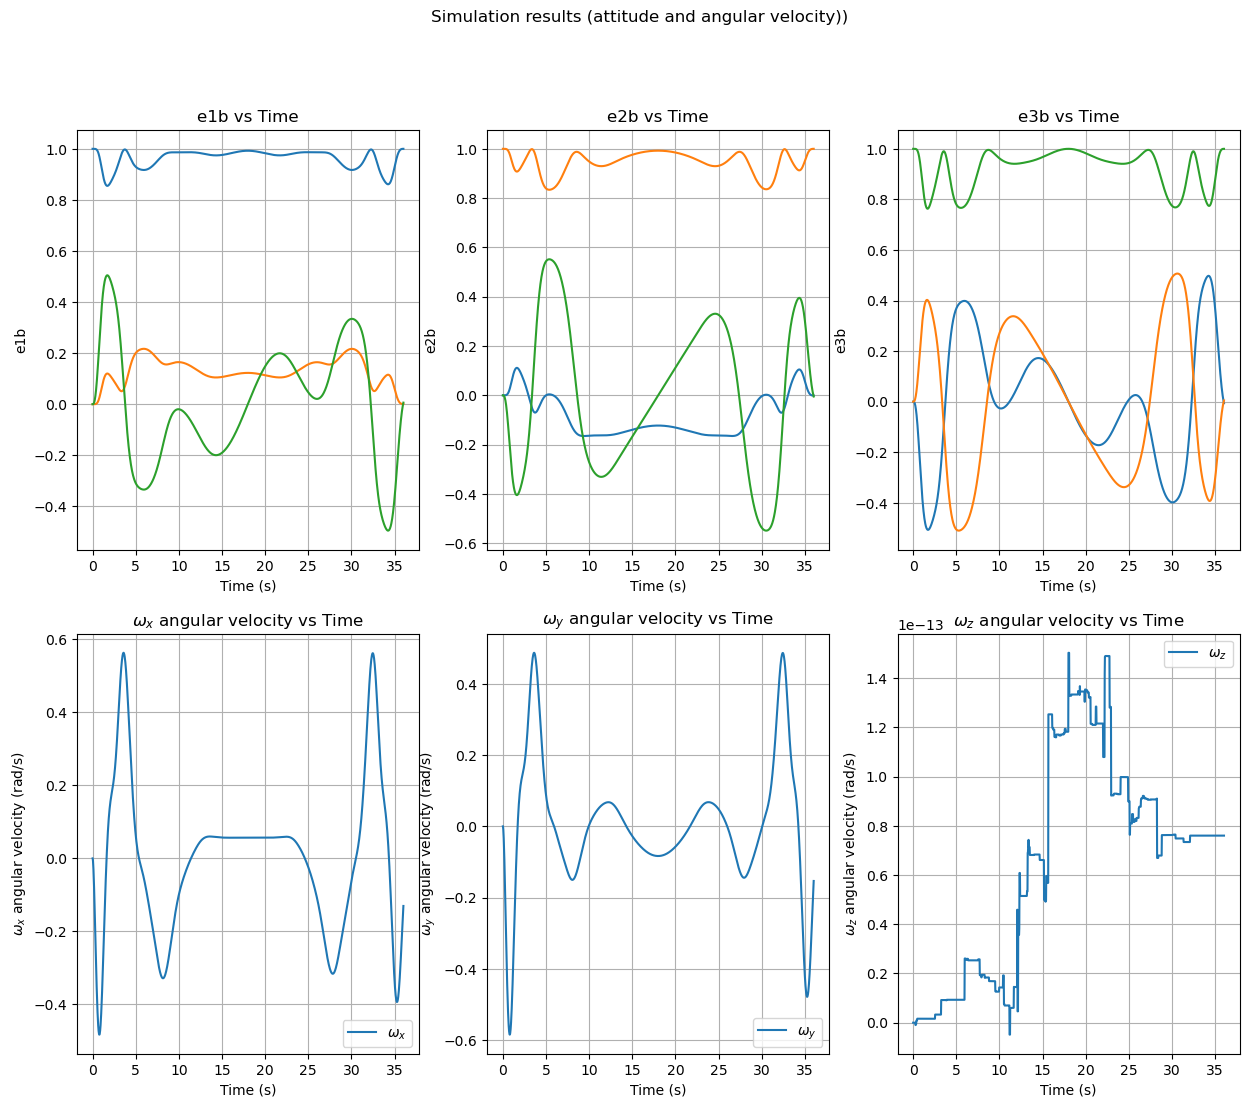

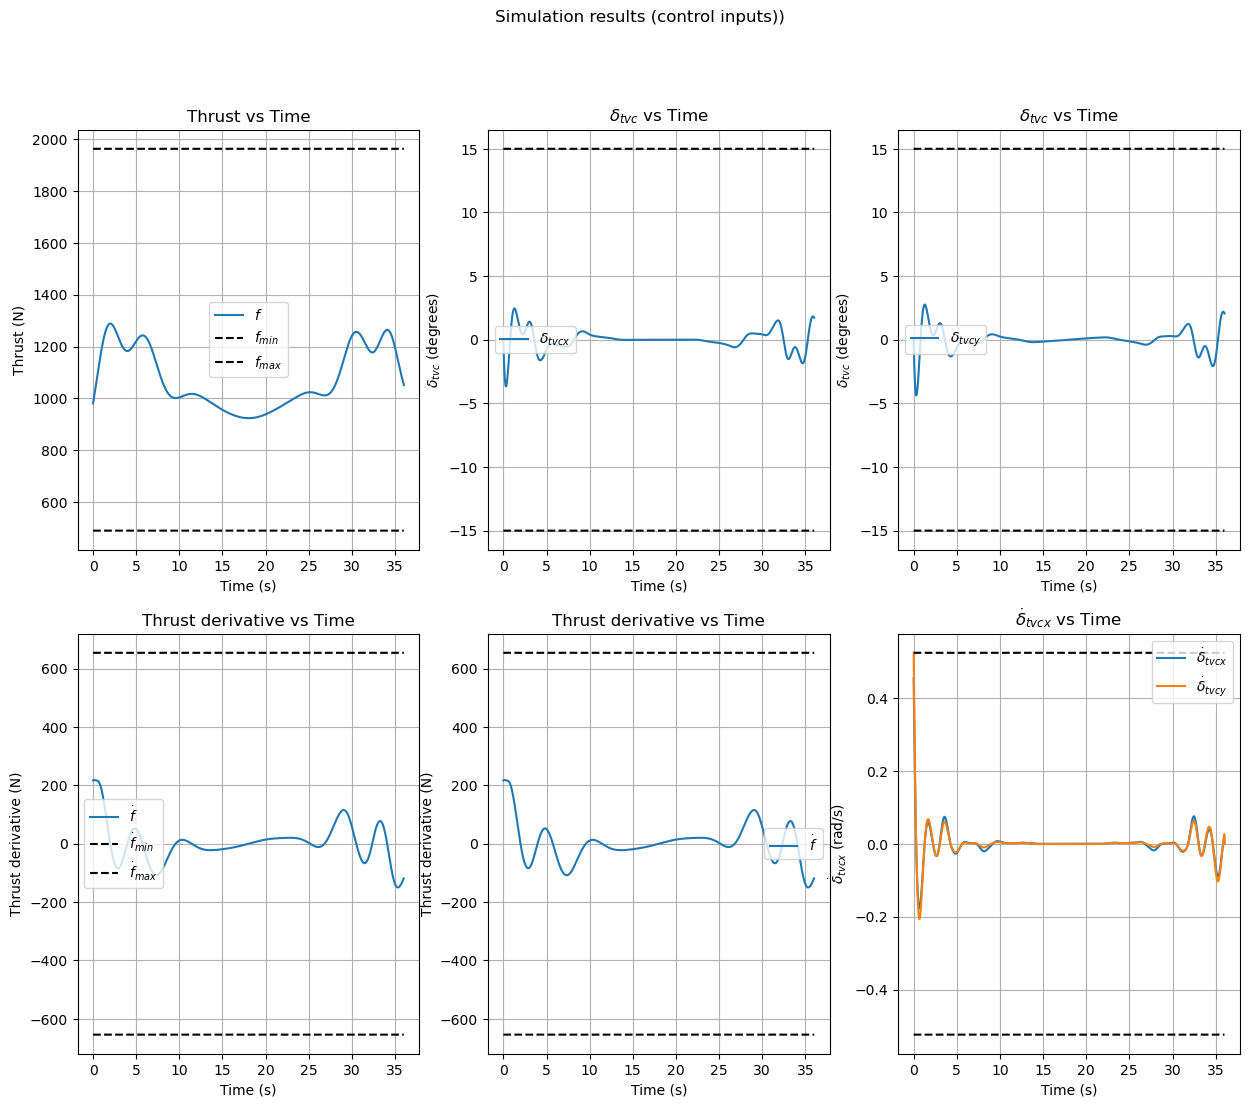

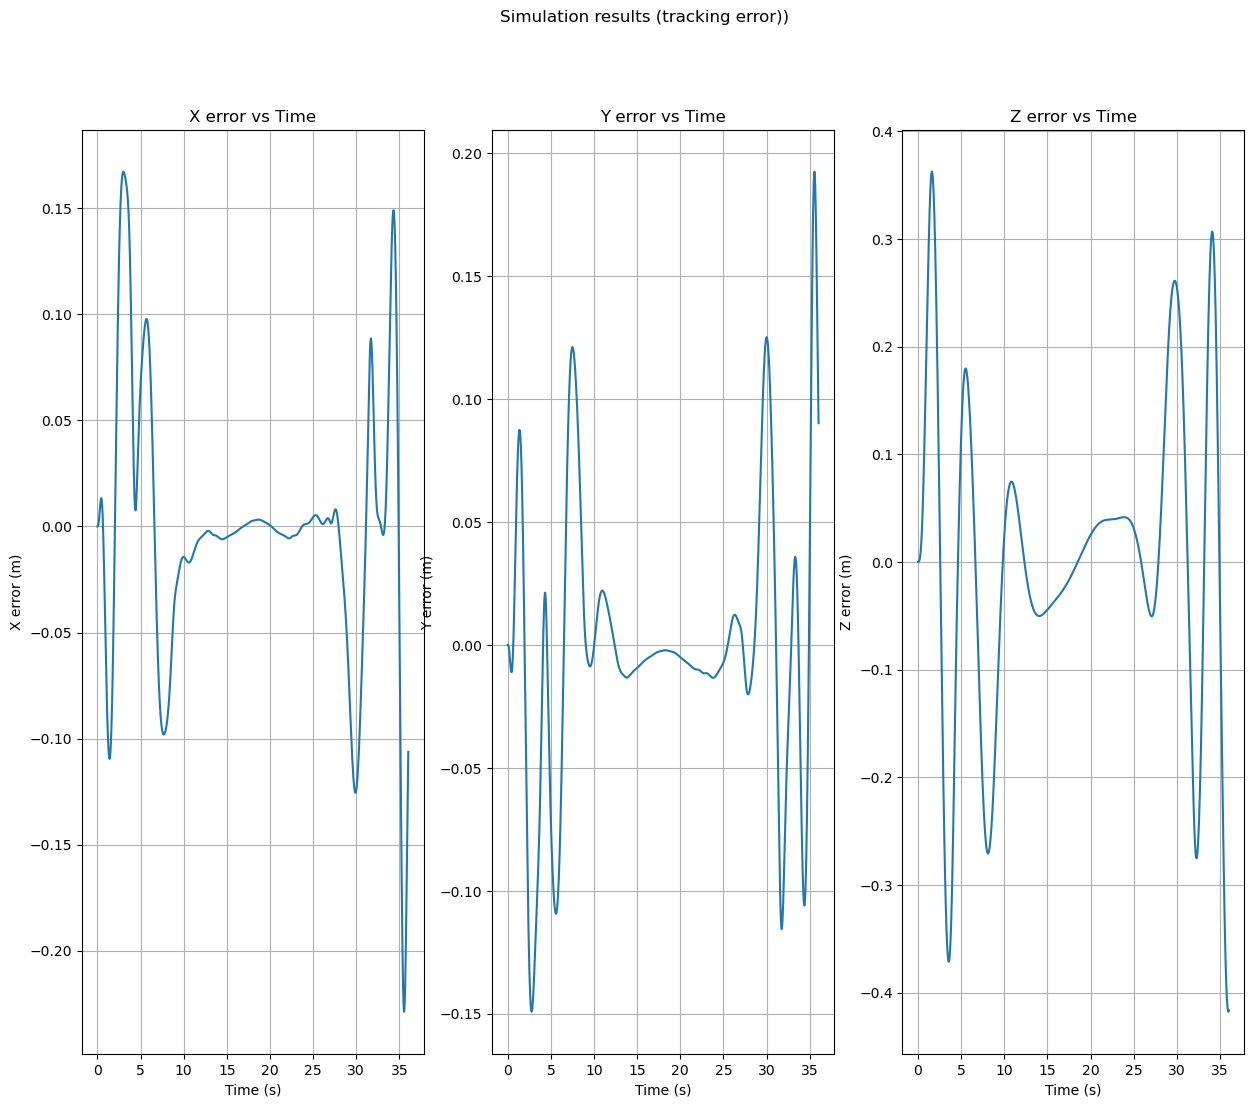

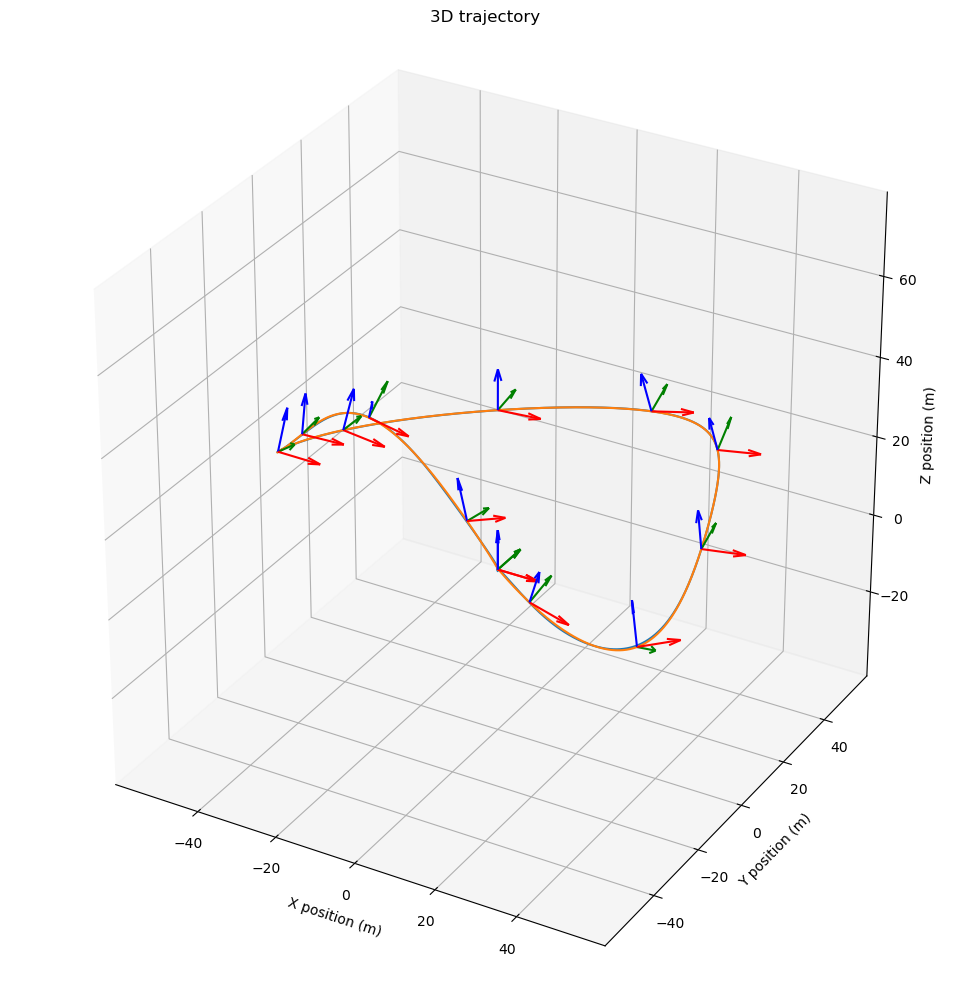

In [8]:
# plot results
controller.plot_simulation()

In [9]:
########################## Saving the simulation ###############################
save_dir = os.getcwd()
controller.export_simulation(save_dir, "example_traj_simulation.json")

## Animation of the simulation

In [12]:
animate_traj(
    t,
    x[:, 0],  # x
    x[:, 2],  # y
    x[:, 4],  # z
    x[:, 6],  # e1bx
    x[:, 7],  # e1by
    x[:, 8],  # e1bz
    x[:, 9],  # e2bx
    x[:, 10],  # e2by
    x[:, 11],  # e2bz
    x[:, 12],  # e3bx
    x[:, 13],  # e3by
    x[:, 14],  # e3bz
    example_traj_parameters,
    save=True,
    file_name="example_traj_animation.mp4",
    directory=""
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1280, 932) to (1280, 944) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
